In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
df= pd.read_csv('Advertising.csv')

In [21]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
df.shape

(200, 5)

In [23]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [25]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [26]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

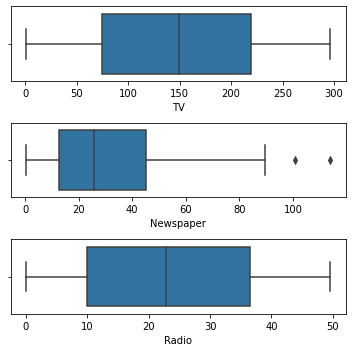

In [31]:
fig, axs =plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

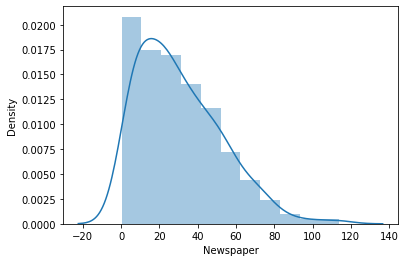

In [32]:
sns.distplot(df['Newspaper'])

In [33]:
iqr = df.Newspaper.quantile(0.75)-df.Newspaper.quantile(0.25)

In [34]:
lower_bridge = df["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [35]:
data = df.copy()

In [36]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

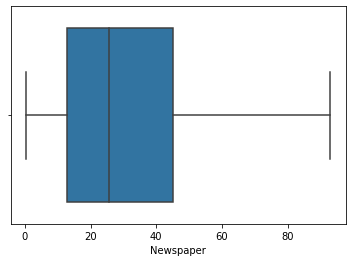

In [37]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

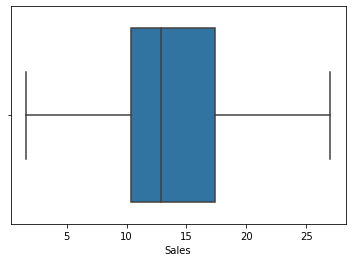

In [38]:
sns.boxplot(data['Sales'])

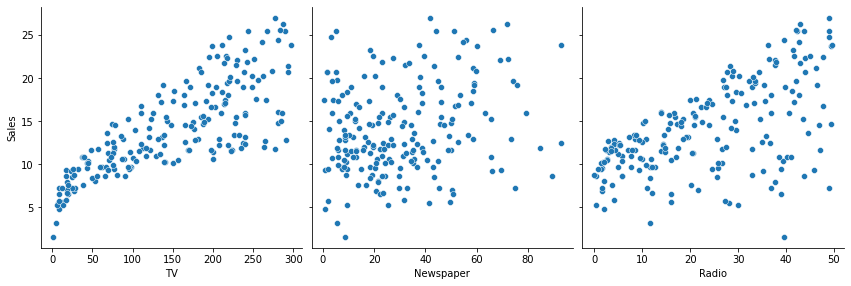

In [39]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

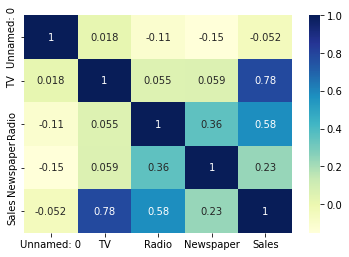

In [40]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show

In [41]:
important_features =  list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [42]:
print(important_features)

['TV', 'Radio', 'Sales']


In [43]:
X = data['TV']
Y = data['Sales']

In [57]:
X=X.values.reshape(-1,1)

In [58]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [59]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [60]:
print(X.shape,Y.shape)

(200, 1) (200,)


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [62]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [64]:
from sklearn.model_selection import train_test_split
x_train,y_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [65]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [68]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [69]:
knn_train_pred = knn.predict(x_train)

In [70]:
knn_test_pred = knn.predict(x_test)

In [71]:
print(knn_train_pred,knn_test_pred)

[ 7.94 13.52 13.7   7.52 19.82 11.24 21.52 16.8  11.24 15.94 13.   13.74
 15.86 23.16 18.78  8.64 17.88 19.74 16.7  11.36 14.74 18.78 13.04  5.26
 19.36 14.36  9.72 18.82 10.88 11.38 20.7   9.92 18.82 17.16 19.72 17.88
 10.44  9.5  19.36  8.64 16.84  6.06 12.38 16.34 13.24 19.82 10.2  11.02
 20.86  7.22 17.58 18.78 20.86 13.4  17.8  17.88 14.8  10.88 16.7   9.96
 16.48 19.96 16.84 21.36 13.74 11.68 19.82 14.36 12.82 10.88  8.66 10.04
 16.8  19.66 14.52 21.36 17.16 17.1  15.   19.76 13.24 19.74  5.26 18.2
 15.    6.06 21.36  6.06 19.66 19.62  9.72  7.52 13.04 13.24  6.06 11.04
 11.38  7.22 19.02 13.6  18.2  13.04  8.4   8.2  11.32 10.04  7.94 14.12
 10.2  11.52  7.52  8.18 19.76 15.86 19.02 20.54 10.26 18.58 11.52 13.04
 11.32 13.7   9.72 16.34 16.34 13.7   8.64 11.68  8.64  7.94 11.52 19.72
 10.04 17.46] [19.36 13.74 13.04 11.52  8.9  11.24 15.   15.   16.8   9.72 11.34 10.88
 12.82 19.66 19.72 18.78  8.66 18.82  8.64 10.26 19.82  7.94 14.74  6.06
  9.72 11.    9.96 17.   17.16 18.78 1

In [72]:
Results = pd.DataFrame(columns=["Model","TrainR2","TestR2","Test RMSE","Variance"])

In [75]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train -r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: -0.7490048929172075
RMSE: 6.396712697419929


In [76]:
Results.head()

,Model,TrainR2,TestR2,Test RMSE,Variance,Test R2,Train R2
0,K-Nearest Neighbours,NaN,NaN,6.396713,1.462725,-0.749005,0.71372
1,K-Nearest Neighbors,NaN,NaN,6.396713,1.462725,-0.749005,0.71372


In [77]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [78]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [79]:
print(svr_train_pred,svr_test_pred)

[ 8.10008069 14.26841714 12.57194711  8.12013242 18.10554495 11.40214877
 19.00143852 15.36346669 11.32251236 17.53221243 12.30673306 14.63170264
 16.96988908 18.590916   18.87109221  8.26642121 16.38886557 19.1217714
 18.55620381 12.20941242 14.49960382 18.8660607  13.11548272  7.89937339
 17.80341952 13.86793475  9.40033538 19.17442342 10.81741708 11.53424595
 19.02444683  8.7684883  19.17747582 16.08975387 18.90999793 16.5108155
 10.35441068  9.58272312 17.79886676  8.32527507 15.78337259  7.92073951
 12.88693196 18.425088   14.07533426 18.13476376 10.26162555 10.50724668
 19.045861    7.99916548 15.5410434  18.86353105 19.05253862 12.4497165
 18.64212344 16.5108155  14.99347645 10.82283865 18.51478723  9.05544068
 17.27821406 19.12162124 15.84796322 18.85843834 14.72182237 11.84814259
 18.0505429  13.82145369 13.91965796 10.82283865  8.54199562  8.88569676
 15.35271351 17.92012388 13.56947497 18.89912663 16.01999518 16.69501742
 17.16816663 19.07963679 14.18477319 19.08485341  7.89

In [80]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train-r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: -0.6085654279446315
RMSE: 6.396712697419929


In [81]:
Results.head()

,Model,TrainR2,TestR2,Test RMSE,Variance,Test R2,Train R2
0,K-Nearest Neighbours,NaN,NaN,6.396713,1.462725,-0.749005,0.713720
1,K-Nearest Neighbors,NaN,NaN,6.396713,1.462725,-0.749005,0.713720
2,Support Vector Machine,NaN,NaN,6.396713,1.266054,-0.608565,0.657488


In [82]:
import statsmodels.api as sm 

In [83]:
x_train_constant = sm.add_constant(x_train)

In [84]:
model = sm.OLS(y_train, x_train_constant).fit()

In [85]:
model.params

const    6.913654
x1       0.050718
dtype: float64

In [86]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     273.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           5.58e-34
Time:                        15:23:24   Log-Likelihood:                -340.30
No. Observations:                 134   AIC:                             684.6
Df Residuals:                     132   BIC:                             690.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9137      0.504     13.716      0.0

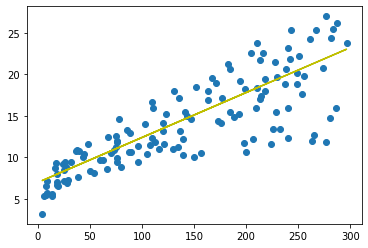

In [87]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [88]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

166    0.178500
26     0.838798
89     4.217551
189   -1.162074
92     1.445120
         ...   
75     0.929218
82     0.567309
147    6.151820
148    2.059076
113   -1.644068
Name: Sales, Length: 134, dtype: float64

In [89]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [90]:
(x_train,res)
plt.show()

In [91]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [92]:
y_pred

array([17.599857  , 14.59737385, 13.15699342, 10.72254763,  9.82991751,
       11.26015441, 17.0115326 , 17.00138908, 15.25670292,  9.93642451,
       10.70226058, 10.78340877, 13.82139426, 17.74186634, 19.17210324,
       19.07573976,  8.51125937, 20.16616861,  8.2120254 ,  9.18073196,
       17.95488034,  7.78599739, 14.38435985,  7.33968233,  9.36331539,
       11.69125419,  9.09958377, 18.80693637, 15.89067318, 19.09095505,
       16.8238774 , 10.74283468, 14.08005412, 13.56273439, 16.60579163,
       18.19325316,  8.18159483, 21.33267388,  8.30838888, 10.73269115,
       16.71229864, 17.2651207 , 13.77067664, 21.65726666, 12.00570343,
       17.31076656,  7.30925176, 19.53219835, 13.59316496,  7.57805515,
       16.93545617, 20.2473168 , 10.41317014,  7.34982585, 17.90923449,
       17.18397251, 17.99038268, 19.09095505, 15.31249231, 14.85603372,
        8.12073369, 17.83822982,  7.50705048,  8.8409239 , 21.15009045,
       16.93545617])

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.293906050957601

In [95]:
r2 = r2_score(y_test, y_pred)
r2

-0.6932373739057045

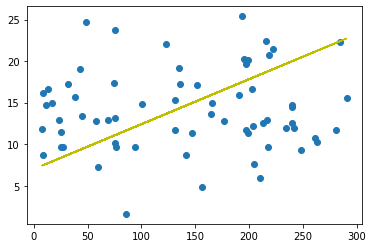

In [96]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.995+0.0541*x_test,'y')
plt.show()